<a href="https://colab.research.google.com/github/swapnilmungi/EDA_Time_Series/blob/main/EDA_Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('/content/drive/MyDrive/aml_project_data_new.csv', index_col="Date", parse_dates=True,)

<ipython-input-2-29a5925a4775>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('/content/drive/MyDrive/aml_project_data_new.csv', index_col="Date", parse_dates=True,)


In [3]:
df.head(5)

,BTC-USD,CL=F,EURUSD=X,GC=F,SDG,^VIX
Date,,,,,,
2016-04-22,445.737000,43.730000,1.129203,1228.699951,42.771637,13.220000
2016-04-23,450.282013,43.366666,1.127271,1232.099975,42.806989,13.506667
2016-04-24,458.554993,43.003333,1.125339,1235.500000,42.842341,13.793333
2016-04-25,461.425995,42.639999,1.123406,1238.900024,42.877693,14.080000
2016-04-26,466.088989,44.040001,1.126900,1242.199951,42.964287,13.960000


In [4]:
df.describe()

,BTC-USD,CL=F,EURUSD=X,GC=F,SDG,^VIX
count,2560.000000,2559.000000,2560.000000,2559.000000,2559.000000,2559.000000
mean,16226.741490,61.537958,1.129501,1537.094764,65.164587,19.086493
std,16402.180206,18.566000,0.056923,268.165162,17.258155,8.117022
min,438.714996,-37.630001,0.959619,1127.800049,40.267677,9.140000
25%,4323.217407,49.005000,1.093548,1281.549988,52.377117,13.055000
50%,9290.770019,58.240002,1.128802,1494.800049,56.636253,17.330000
75%,22841.730955,71.299999,1.175515,1798.299988,80.558784,22.830000
max,67566.828130,123.699997,1.251001,2051.500000,97.758499,82.690002


# Performance of SDG over the years

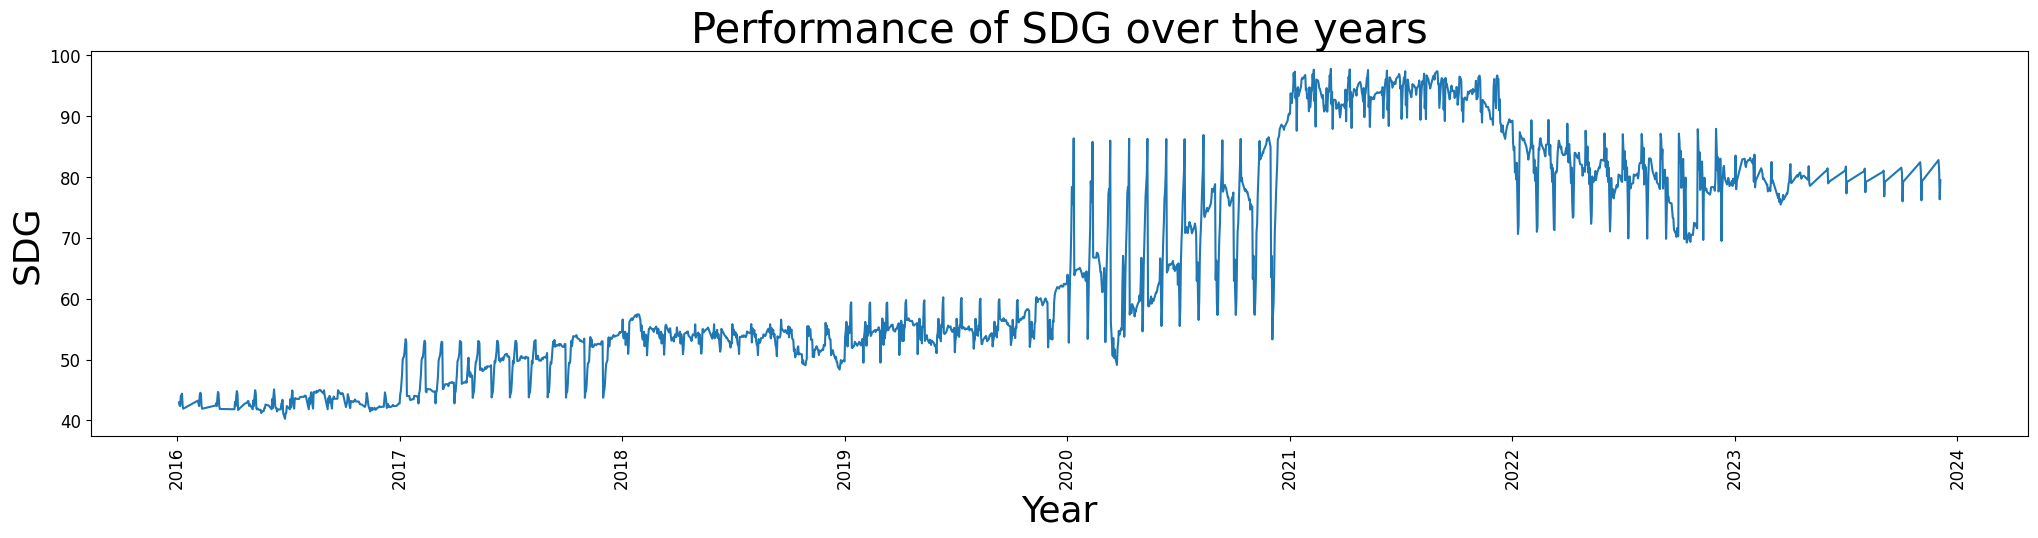

In [5]:
plt.figure(figsize=(25,5))
sns.lineplot(x='Date', y = 'SDG', data= df)
plt.xticks(rotation =90,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Performance of SDG over the years",fontsize=30)
plt.xlabel('Year',fontsize=26)
plt.ylabel('SDG',fontsize=26)
plt.show()


# Performance of BTC-USD over the years

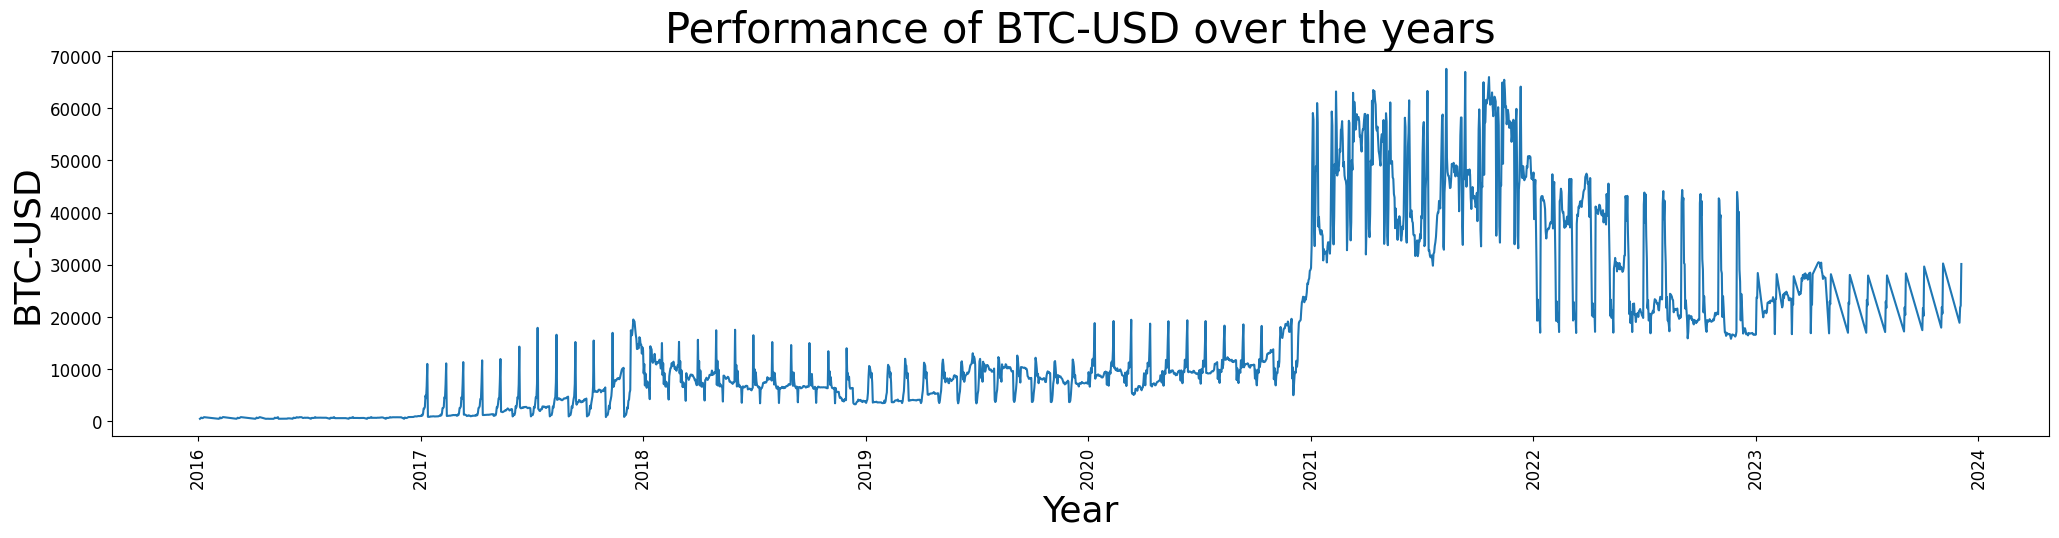

In [6]:
plt.figure(figsize=(25,5))
sns.lineplot(x='Date', y = 'BTC-USD', data= df)
plt.xticks(rotation =90,fontsize=12)
plt.yticks(fontsize=12)
plt.title("Performance of BTC-USD over the years",fontsize=30)
plt.xlabel('Year',fontsize=26)
plt.ylabel('BTC-USD',fontsize=26)
plt.show()

# Subplot to identify trends of all columns 

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

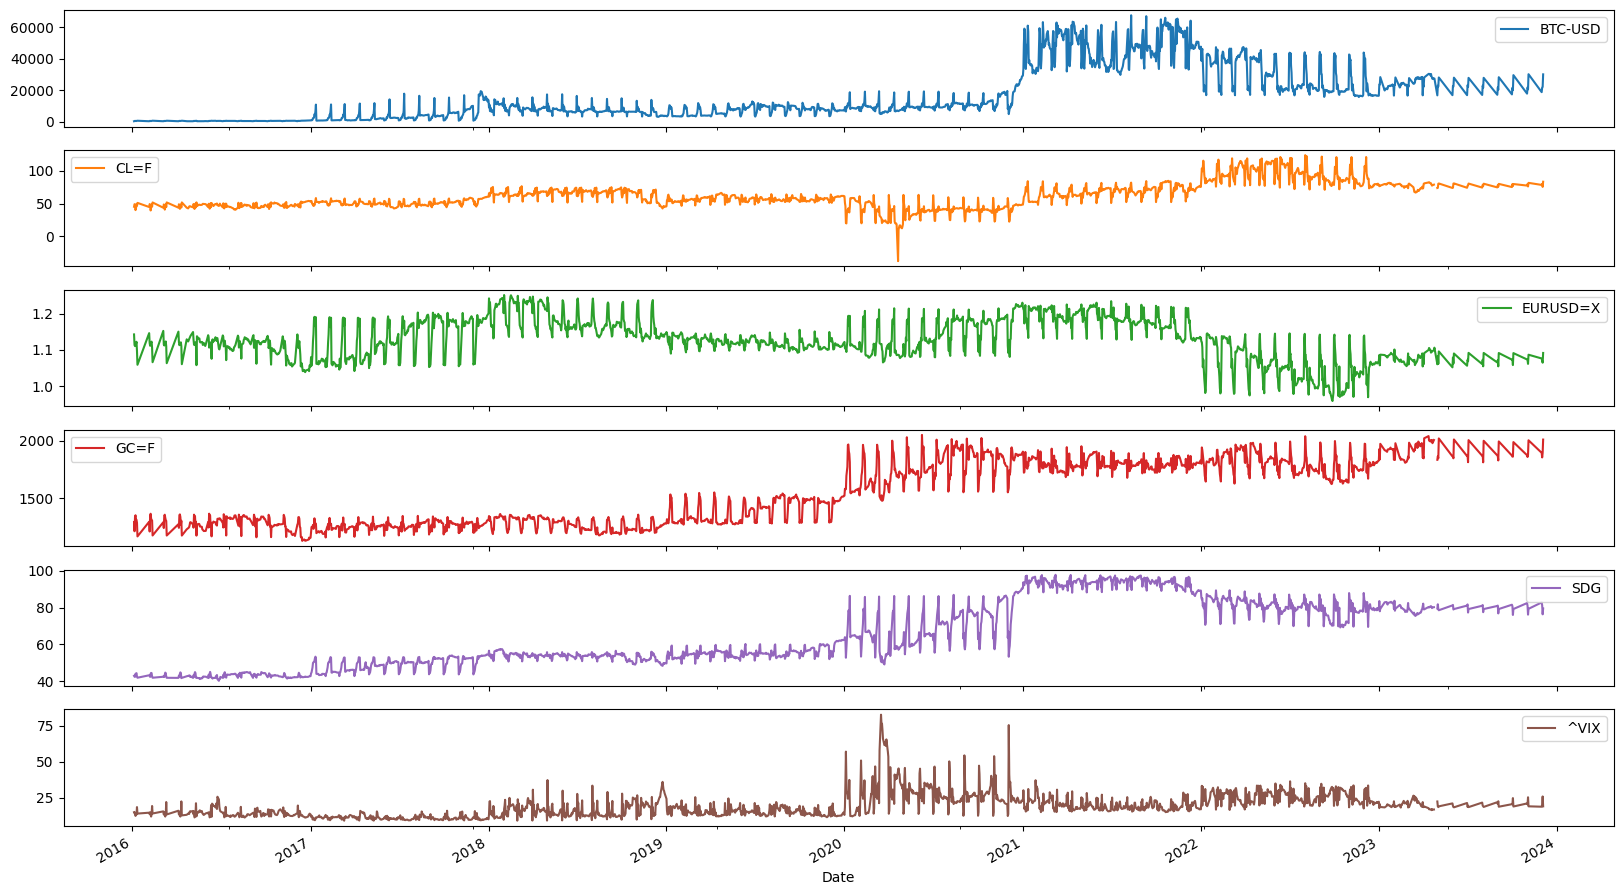

In [7]:
df.plot(subplots=True, figsize=(20, 12))

#Differencing: Differencing is used to make the difference in values of a specified interval.

<Axes: xlabel='Date'>

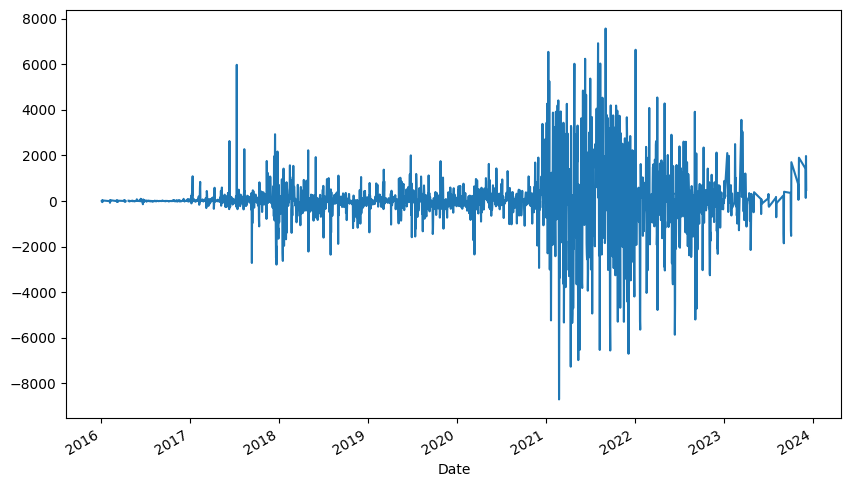

In [8]:
df['BTC-USD'].diff(2).plot(figsize=(10, 6))

# **Plotting the Changes in Data**
# Shift: The shift function can be used to shift the data before or after the specified time interval. We can specify the time, and it will shift the data by one day by default. That means we will get the previous day’s data. It is helpful to see previous day data and today’s data simultaneously side by side.

<Axes: xlabel='Date'>

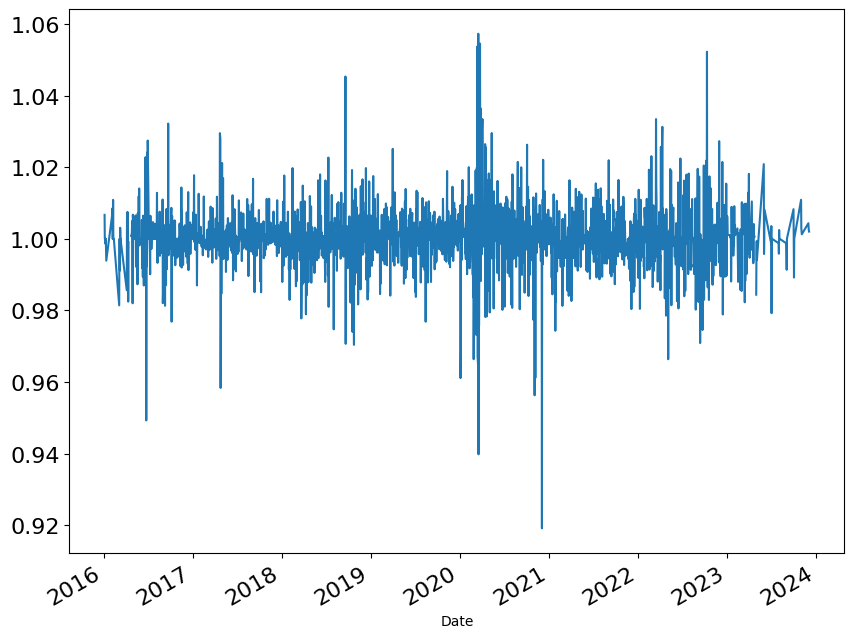

In [9]:
df['Change'] = df.SDG.div(df.SDG.shift())
df['Change'].plot(figsize=(10, 8), fontsize=16)

# We can also take a specific interval of time and plot to have a clearer look. Here we are plotting the data of only 2017.

<Axes: xlabel='Date'>

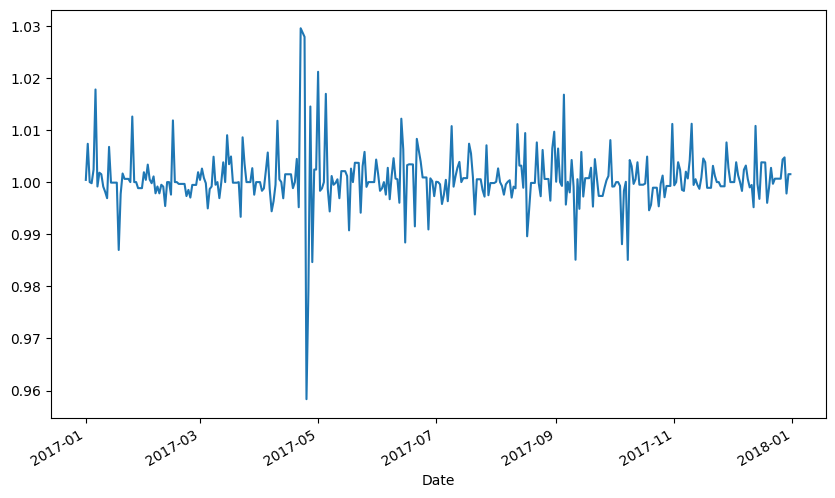

In [36]:
df.loc['2017']['Change'].plot(figsize=(10, 6))

# Boxplots for monthly performance of SDG and Gold since 2016

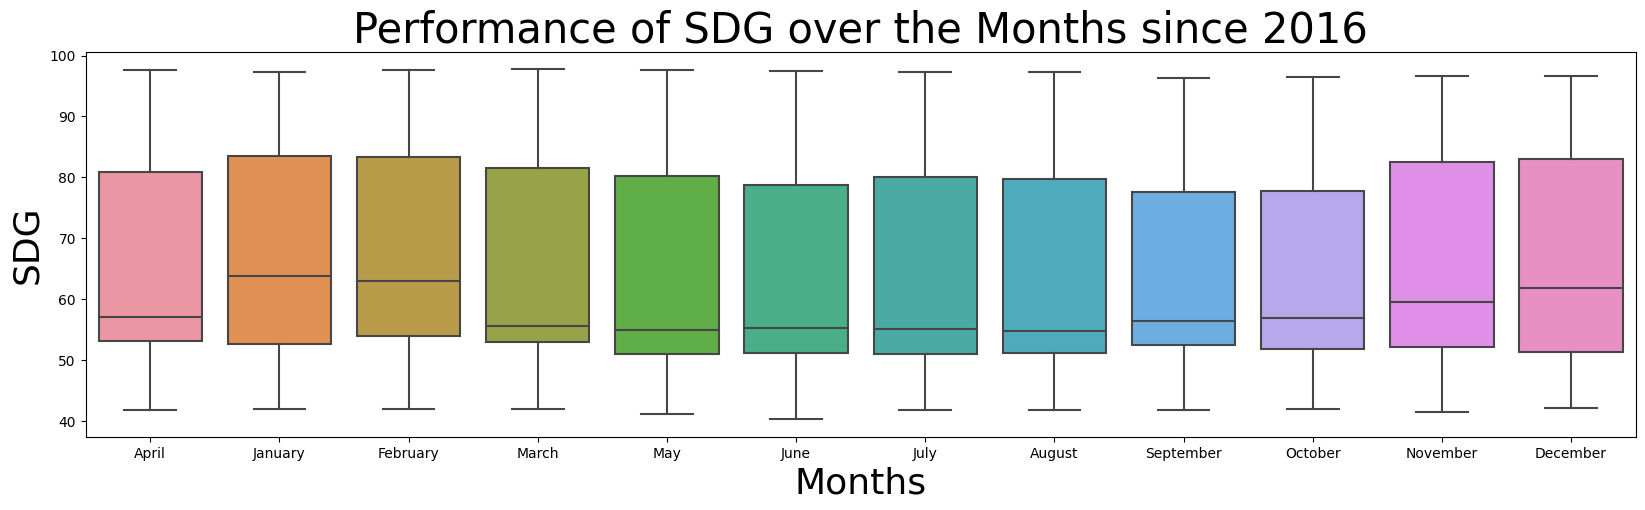

In [34]:
df.index = pd.to_datetime(df.index)
_ ,ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=df.index.month_name(), y=df['SDG'], ax=ax)
plt.title("Performance of SDG over the Months since 2016",fontsize=30)
plt.xlabel('Months',fontsize=26)
plt.ylabel('SDG',fontsize=26)
plt.show()

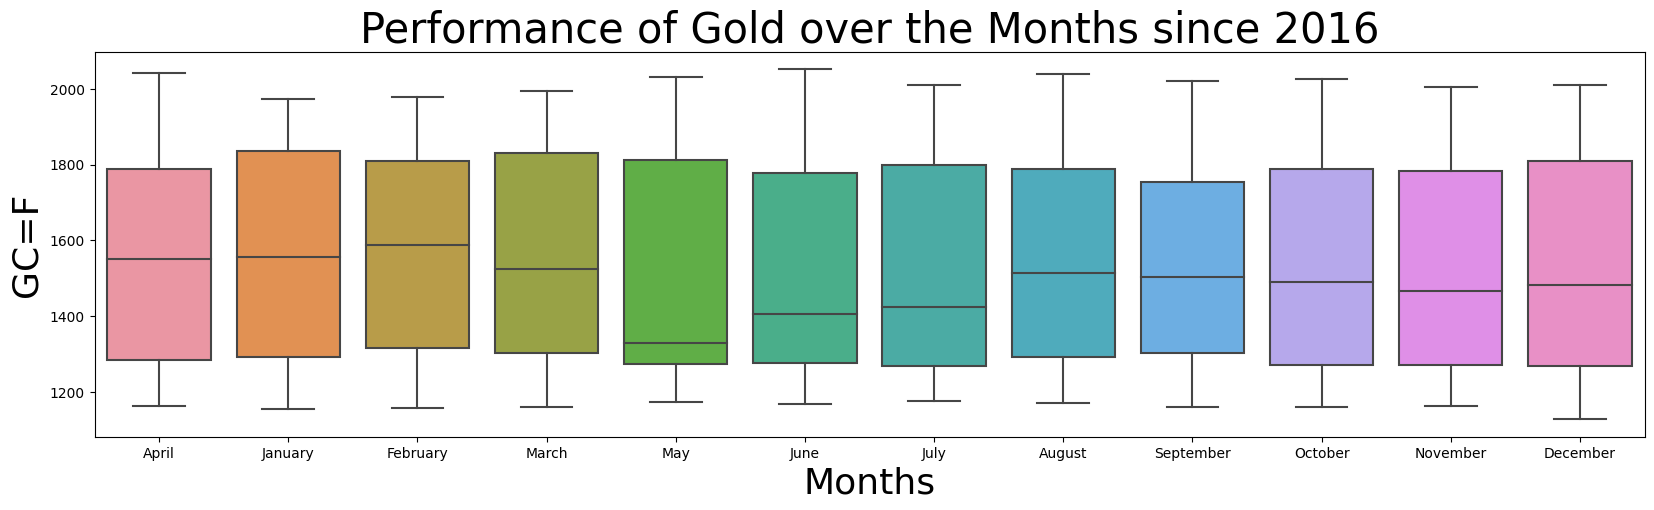

In [35]:
df.index = pd.to_datetime(df.index)
_ ,ax = plt.subplots(figsize=(20,5))
sns.boxplot(x=df.index.month_name(), y=df['GC=F'], ax=ax)
plt.title("Performance of Gold over the Months since 2016",fontsize=30)
plt.xlabel('Months',fontsize=26)
plt.ylabel('GC=F',fontsize=26)
plt.show()